# 1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# 2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# Read the Marketing Dataset
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# You have to include the full link to the csv file containing your dataset

# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# 3: VISUALIZE AND EXPLORE DATASET

<Axes: >

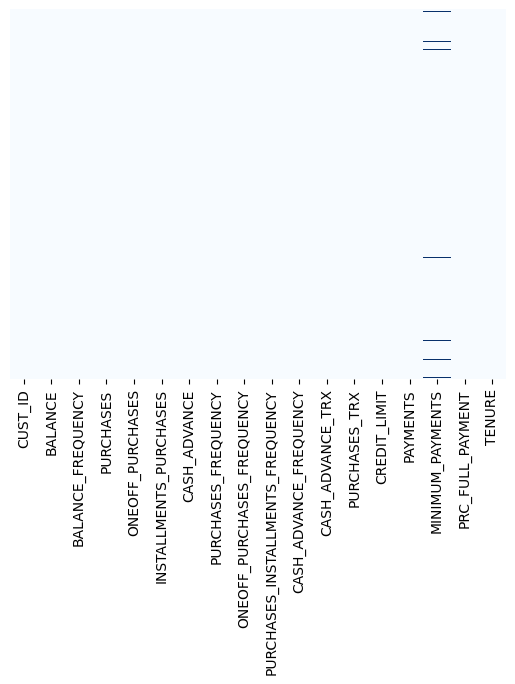

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-24-06289747d4be>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-24-06289747d4be>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

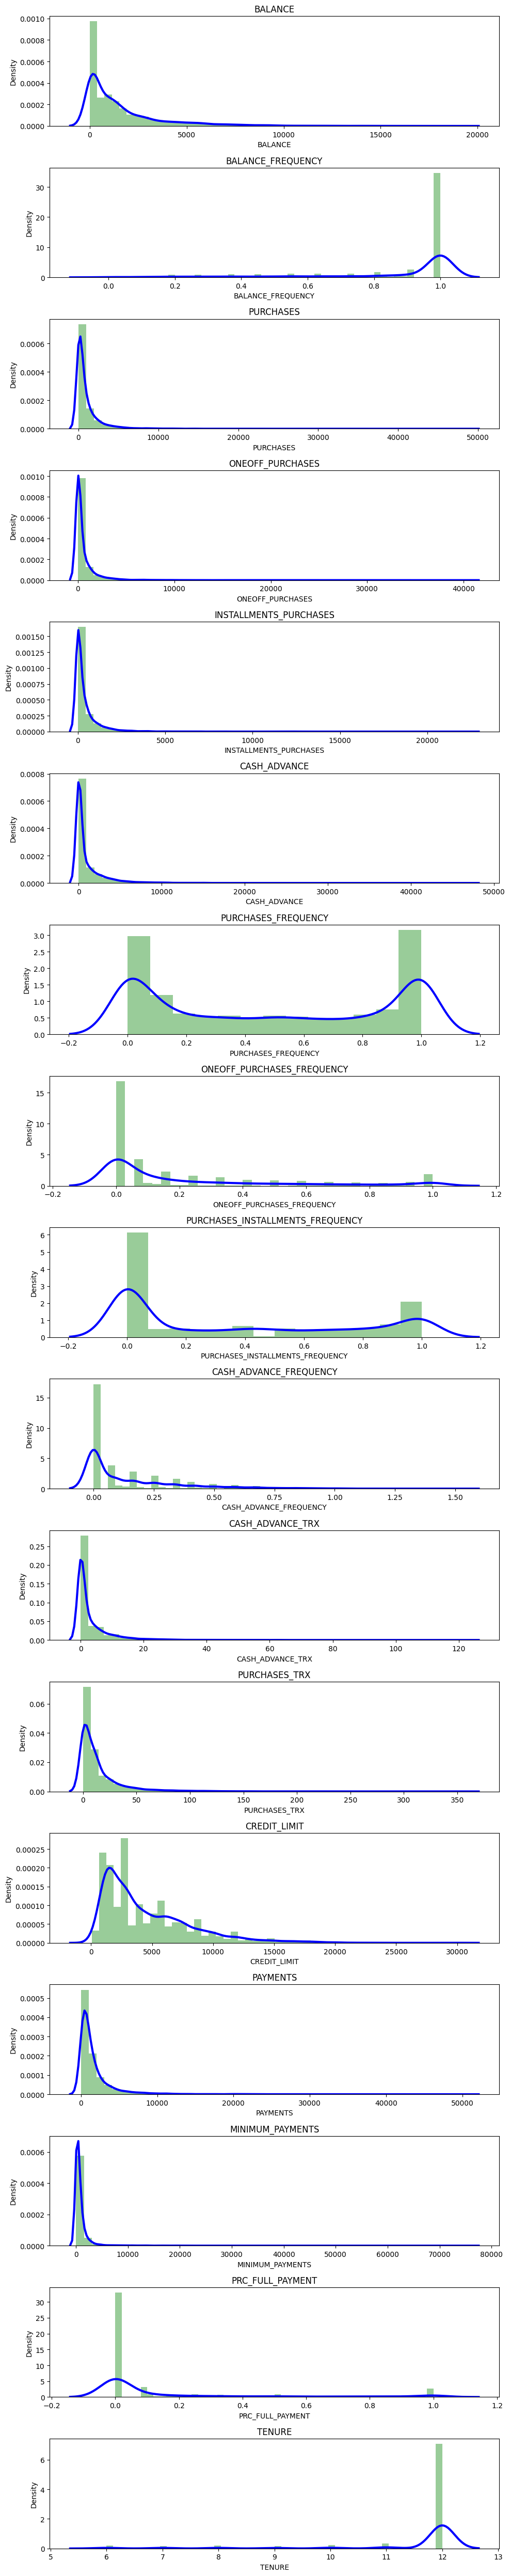

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure
plt.figure(figsize = (10, 50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
correlations = creditcard_df.corr()

<Axes: >

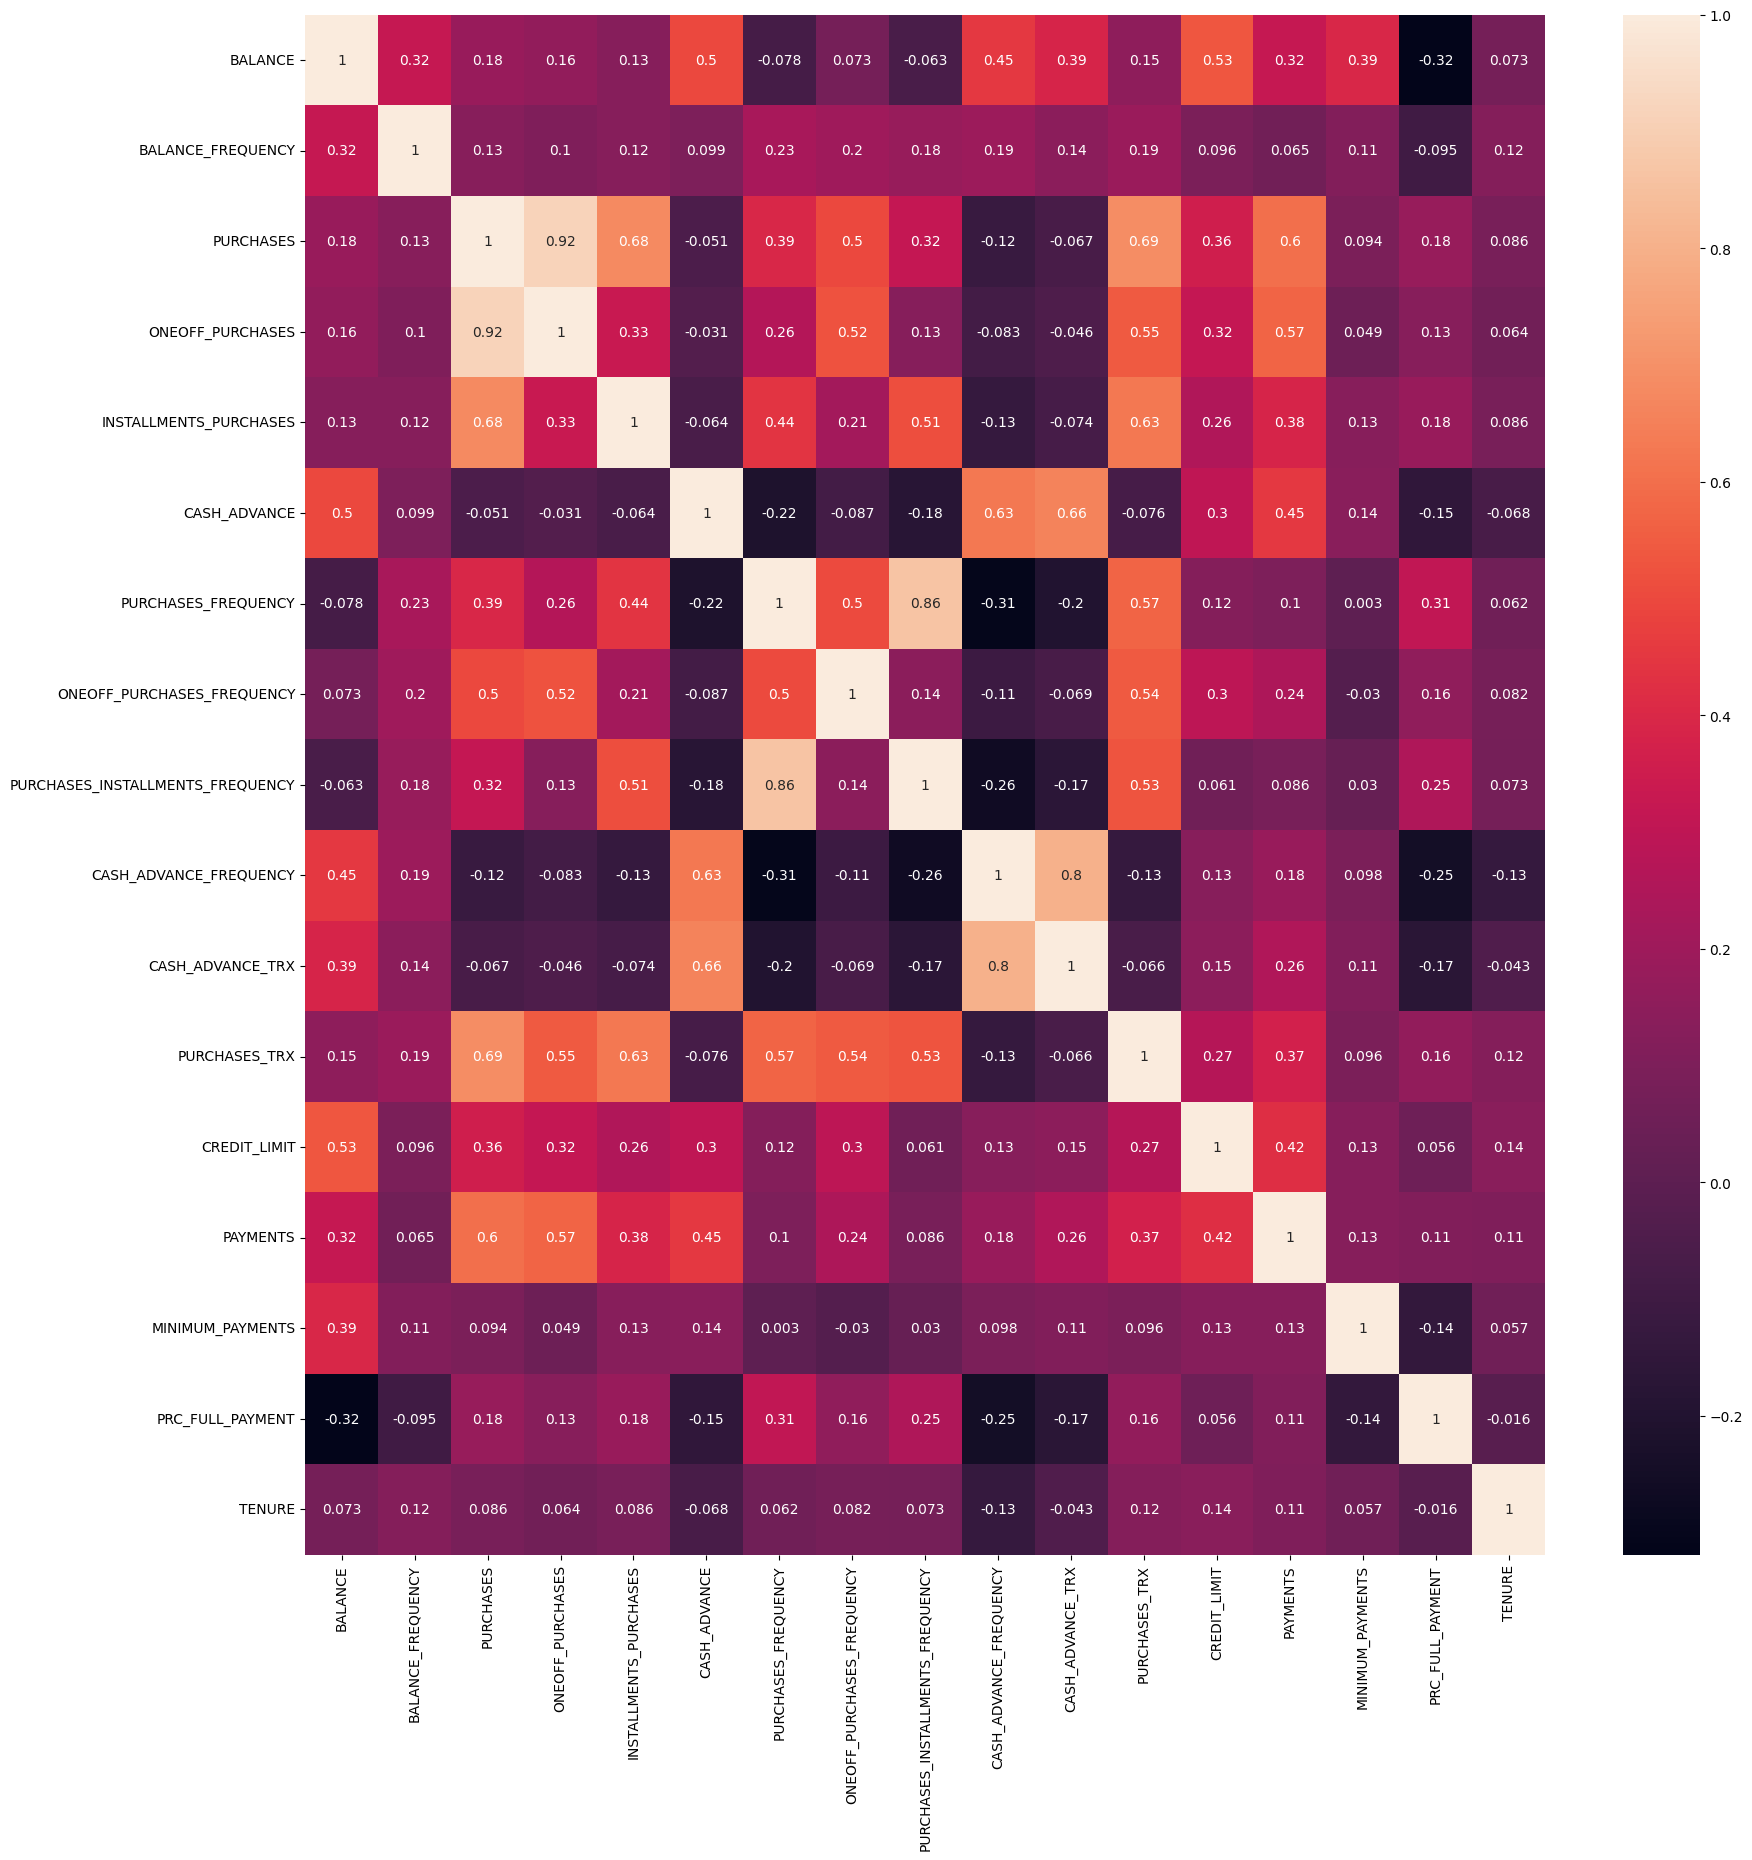

In [ ]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot=True)

# 4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# 5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


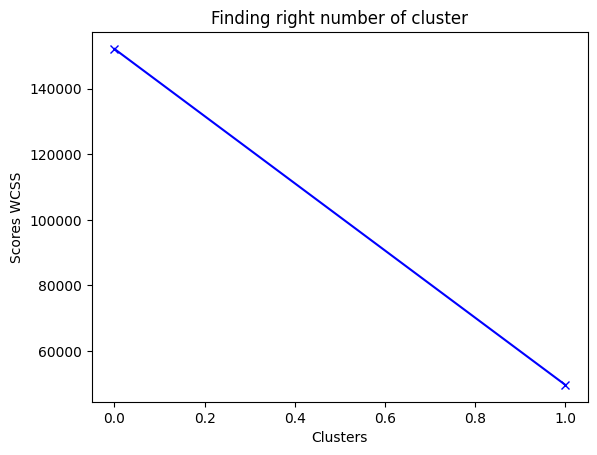

In [ ]:
score_1 = []
range_values = (1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)

plt.plot(score_1, 'bx-')
plt.title('Finding right number of cluster')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [ ]:
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.


# 6: APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.583972,0.372569,-0.228953,-0.162097,-0.243623,1.967331,-0.482885,-0.211934,-0.429425,1.922211,1.861631,-0.281826,0.970137,0.752504,0.346780,-0.389611,-0.092604
1,-0.698385,-2.139939,-0.317922,-0.236787,-0.316599,-0.307087,-0.565356,-0.436184,-0.459077,-0.488049,-0.362249,-0.428033,-0.214924,-0.222079,-0.255349,0.253131,-0.153700
2,-0.399099,0.306488,-0.062141,-0.257662,0.326396,-0.360535,0.980501,-0.414858,1.175454,-0.461583,-0.357617,0.136027,-0.317322,-0.242129,-0.120367,0.365211,-0.027331
3,-0.015236,0.367520,-0.363489,-0.246677,-0.406191,-0.075520,-0.872731,-0.403994,-0.770008,0.148230,-0.018940,-0.490857,-0.342418,-0.267639,-0.073722,-0.454632,-0.016288
4,0.988110,0.467837,2.439108,1.828824,2.407442,-0.162989,1.165971,1.596116,1.265496,-0.284574,-0.156426,3.046510,1.279850,1.415426,0.339479,0.280574,0.338760
5,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491
6,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
7,-0.129256,0.392862,0.495845,0.620453,0.032396,-0.327158,0.945365,1.823828,0.159079,-0.400205,-0.321548,0.573185,0.403803,0.111661,-0.155630,0.384228,0.199014


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4861.379145,0.965529,514.042335,323.388731,190.761994,5104.455232,0.296545,0.139234,0.193773,0.519798,15.953092,7.704691,8024.205272,3911.570503,1672.363293,0.039760,11.393390
1,110.844636,0.370339,323.959682,199.419085,124.770674,334.895293,0.263446,0.072336,0.181988,0.037481,0.776744,4.070543,3712.468135,1090.246242,269.125762,0.227751,11.311628
2,733.783113,0.949875,870.440589,164.770441,706.223875,222.812561,0.883873,0.078698,0.831593,0.042777,0.808353,18.090951,3339.901802,1032.204968,583.696815,0.260532,11.480742
3,1532.761492,0.964333,226.604018,183.003766,43.753897,820.501455,0.140081,0.081939,0.058416,0.164806,3.119573,2.508959,3248.592924,958.355129,692.401226,0.020743,11.495520
4,3621.142994,0.988097,6214.397680,3627.909973,2588.087707,637.075947,0.958311,0.678610,0.867378,0.078198,2.181333,90.434667,9151.066667,5830.662062,1655.348988,0.235778,11.970667
5,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
6,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
7,1295.440104,0.970336,2062.584286,1622.261660,440.363088,292.805784,0.869771,0.746541,0.427659,0.055059,1.054500,28.957060,5963.649125,2056.391690,501.517666,0.266095,11.783650


In [ ]:
# Labels associated to each data point
labels.shape

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
y_means = kmeans.fit_predict(creditcard_df_scaled)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 4, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


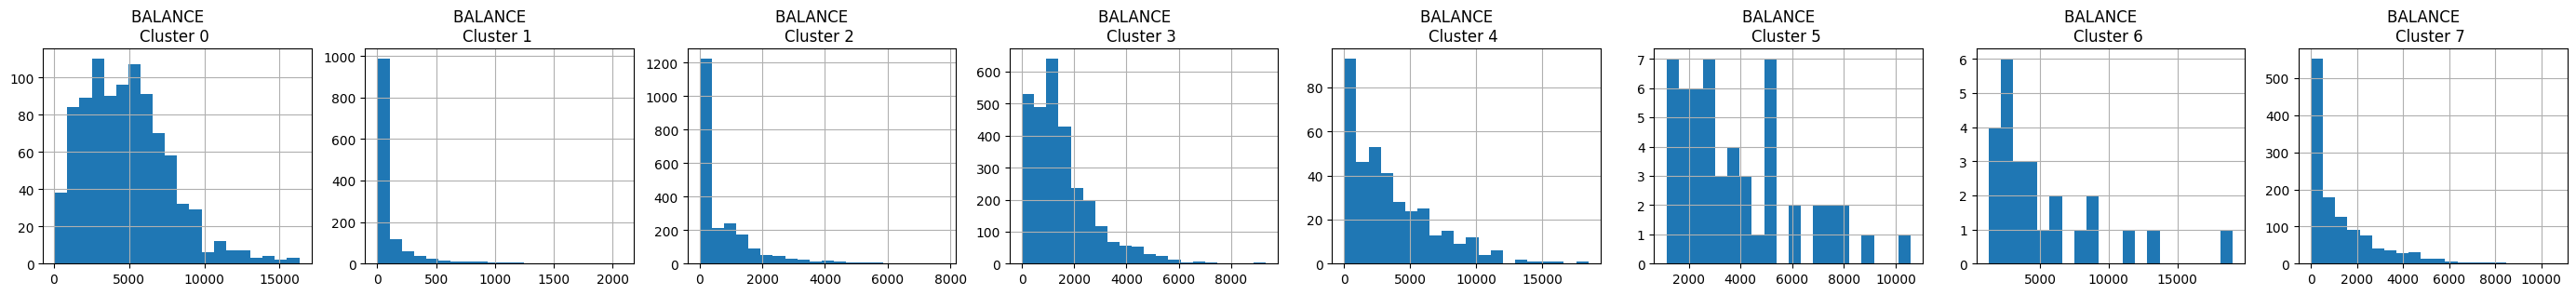

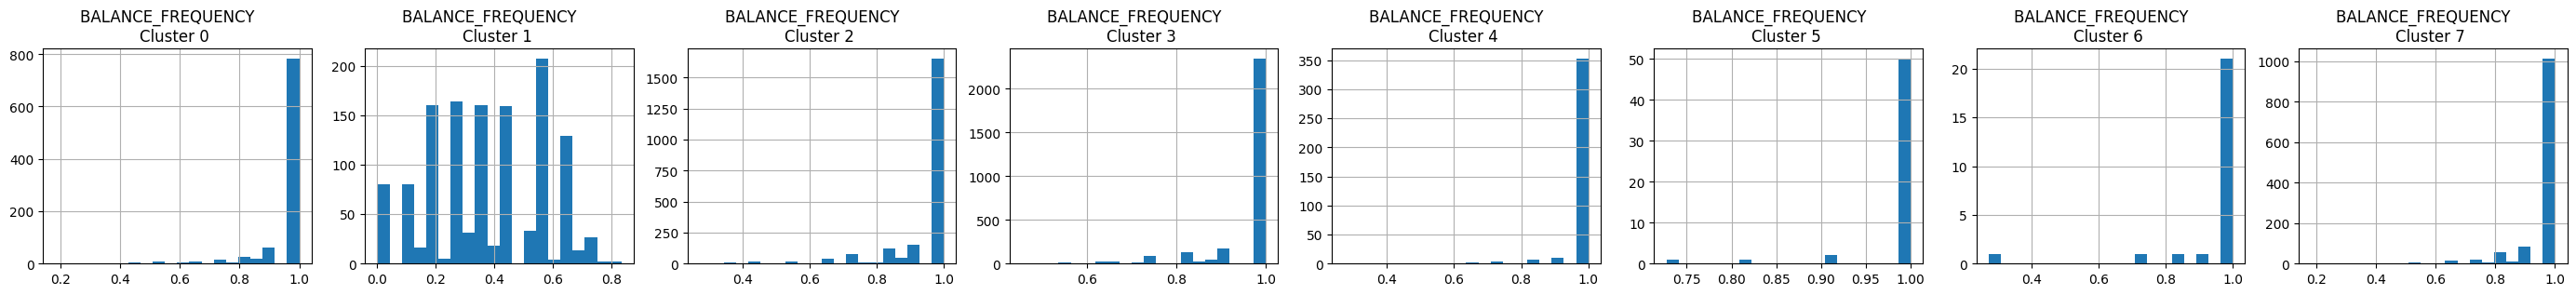

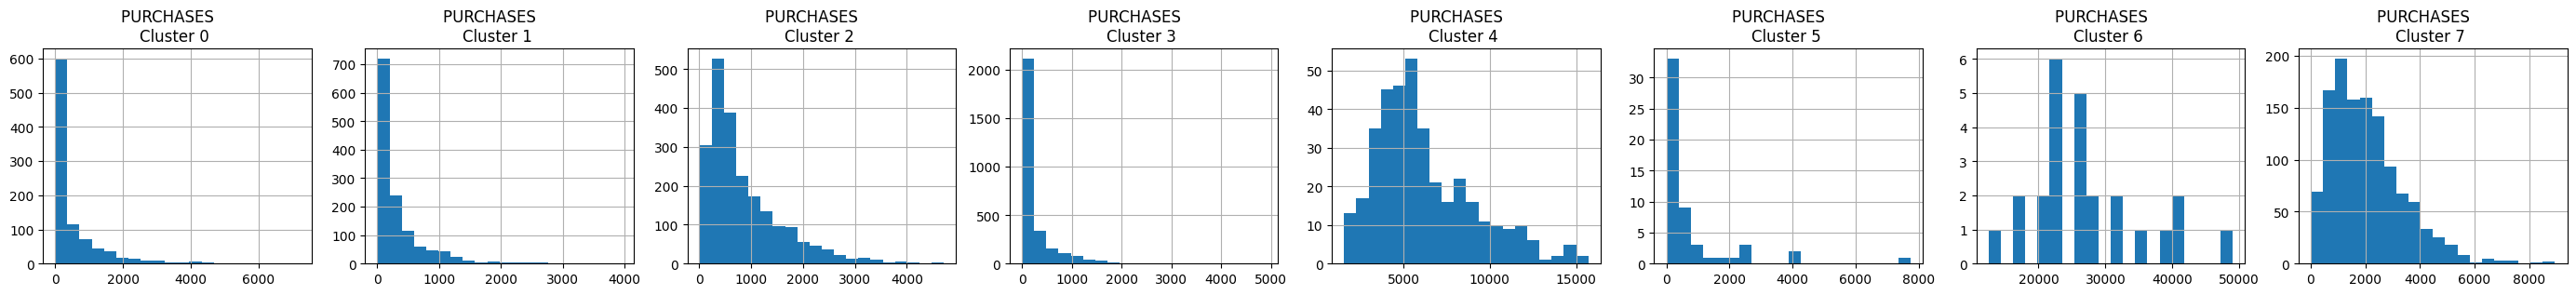

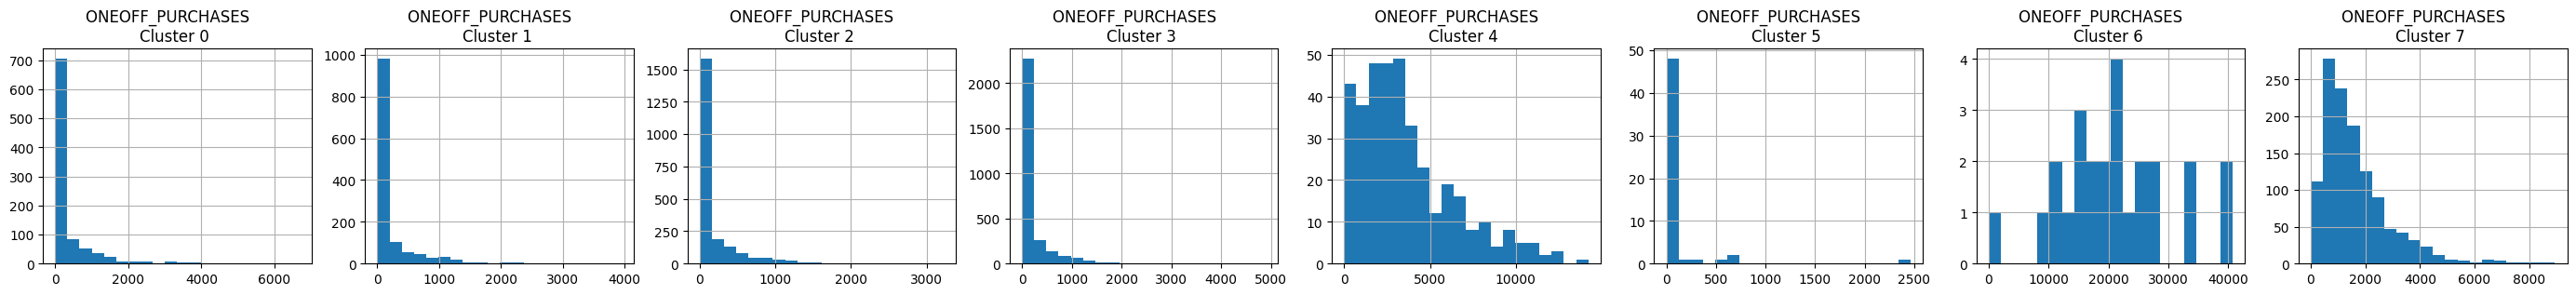

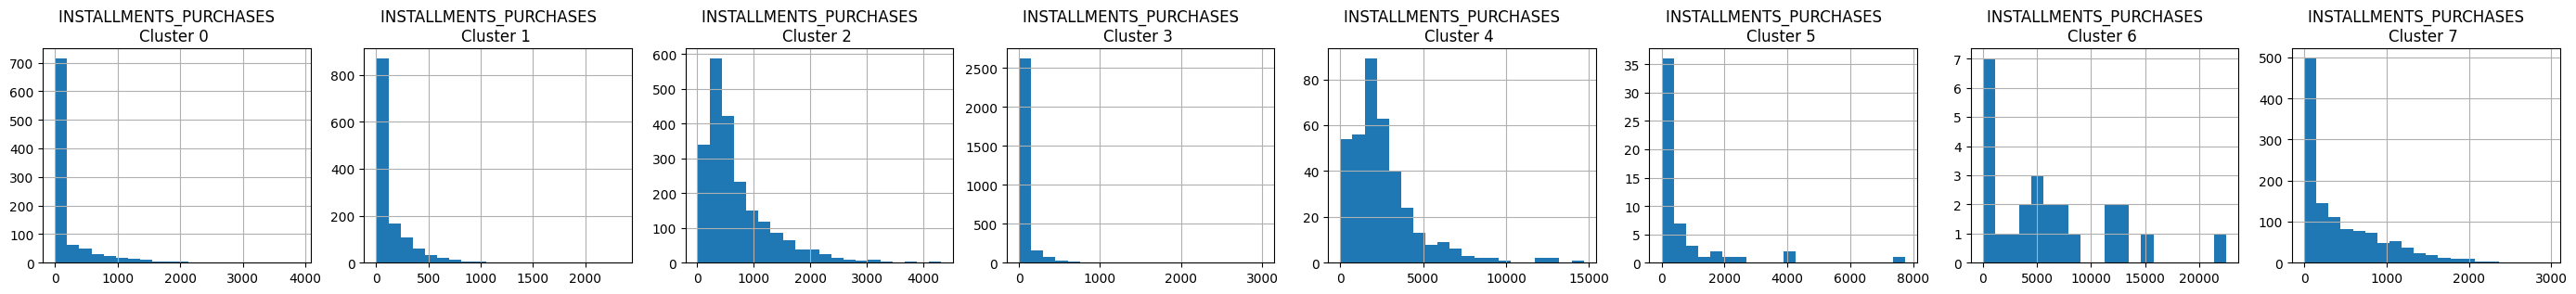

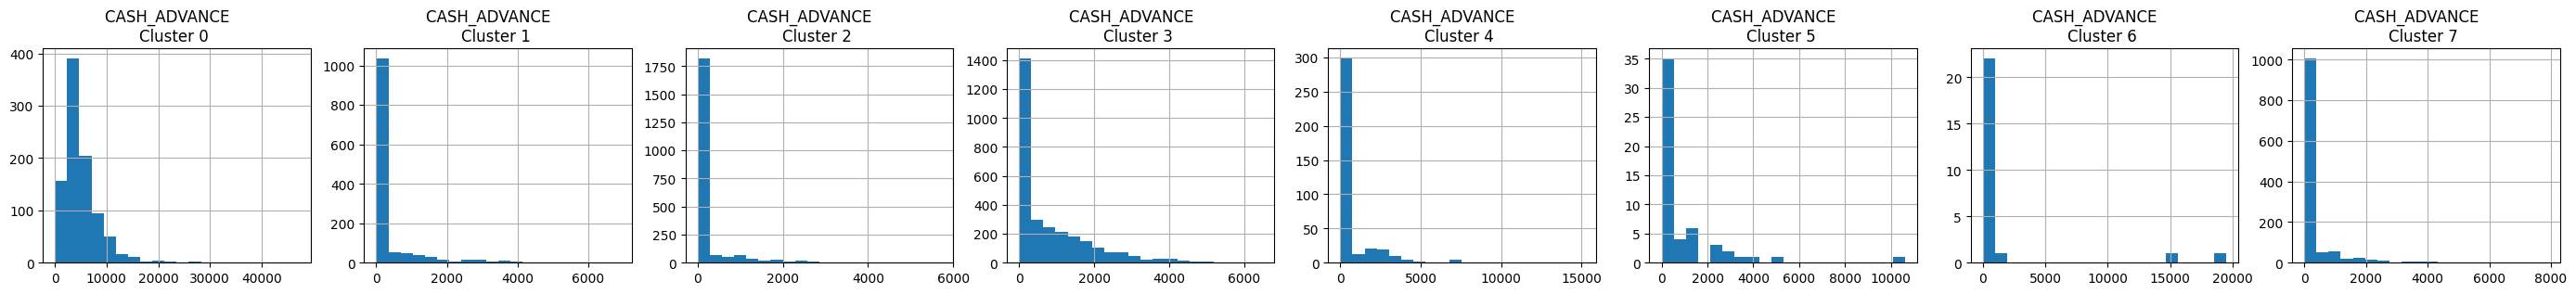

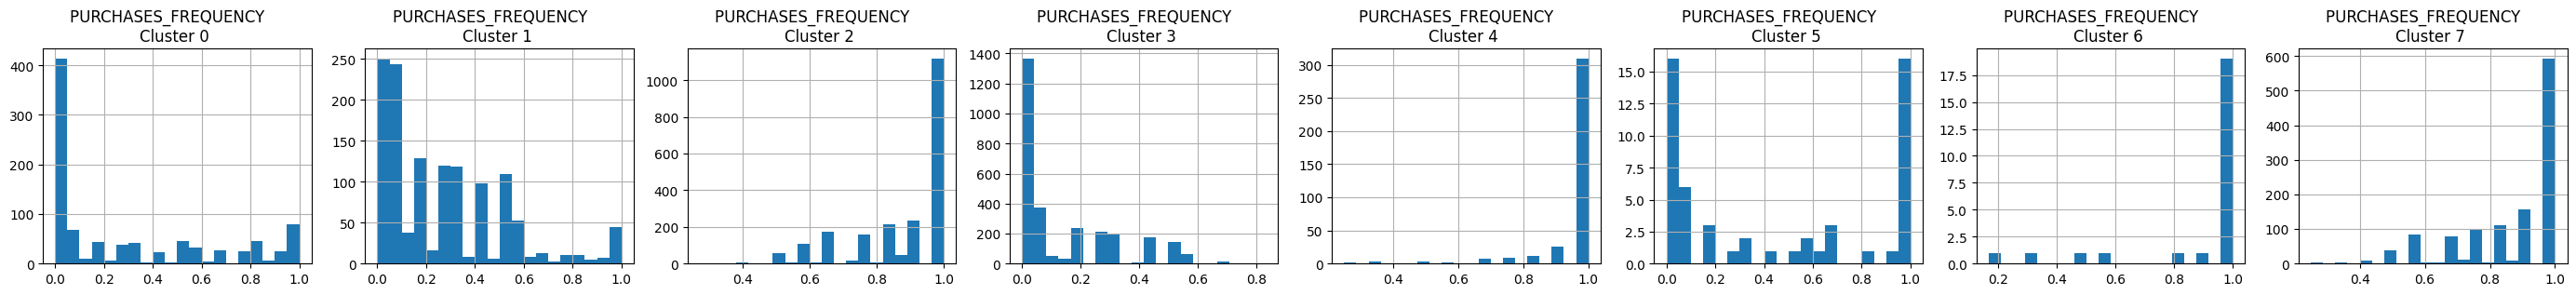

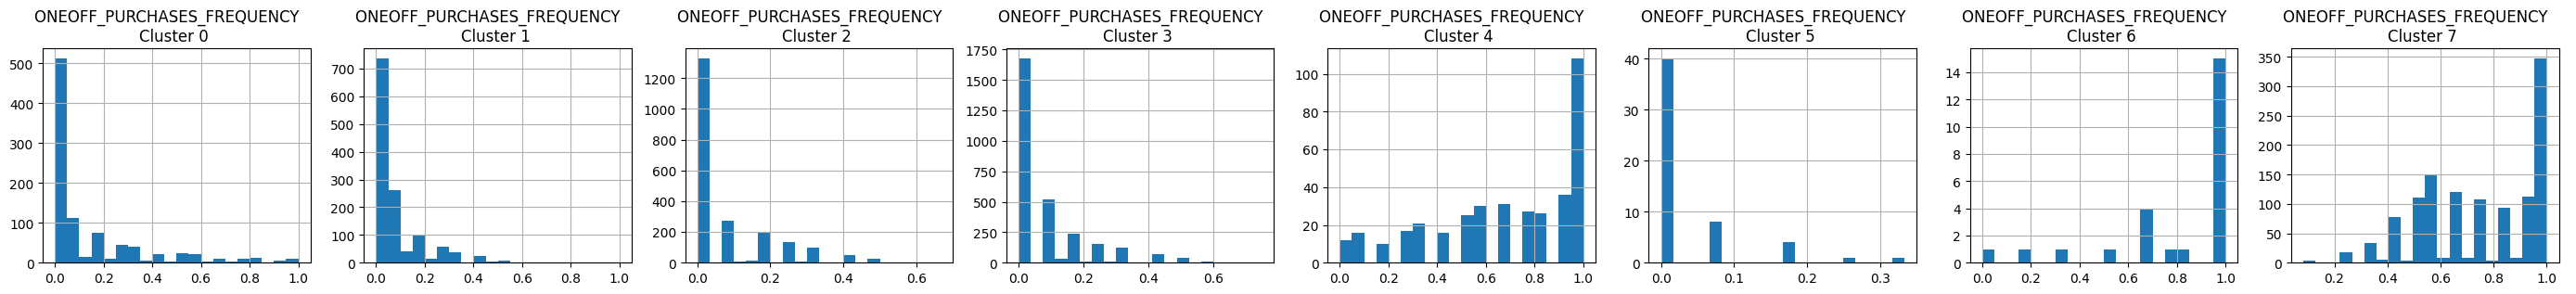

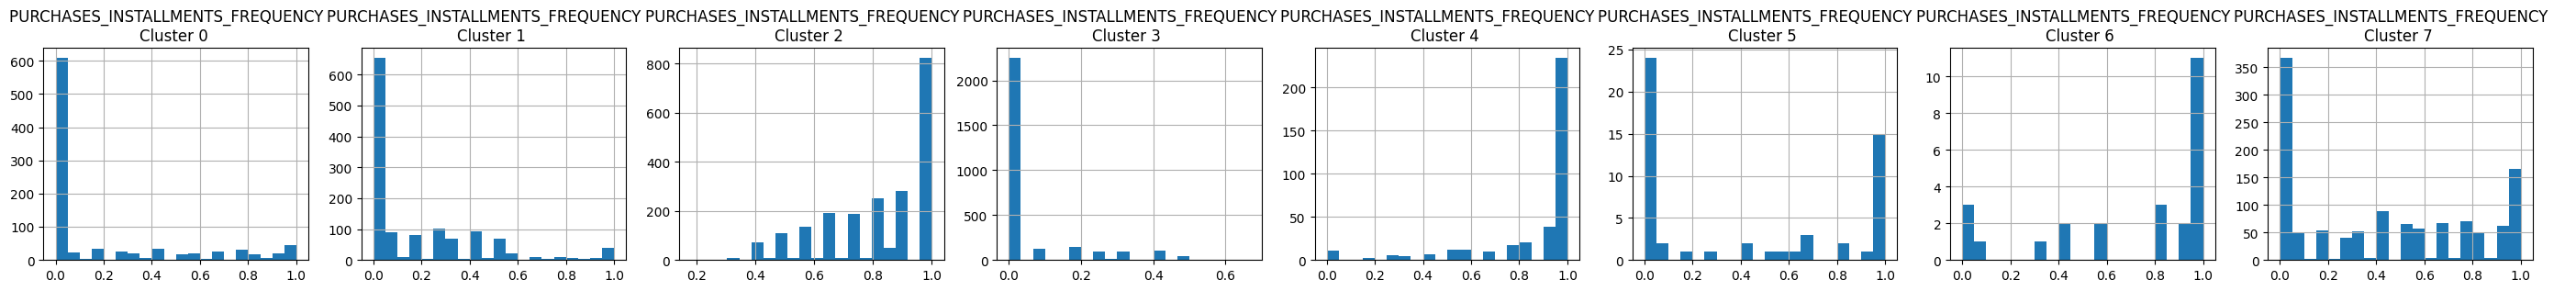

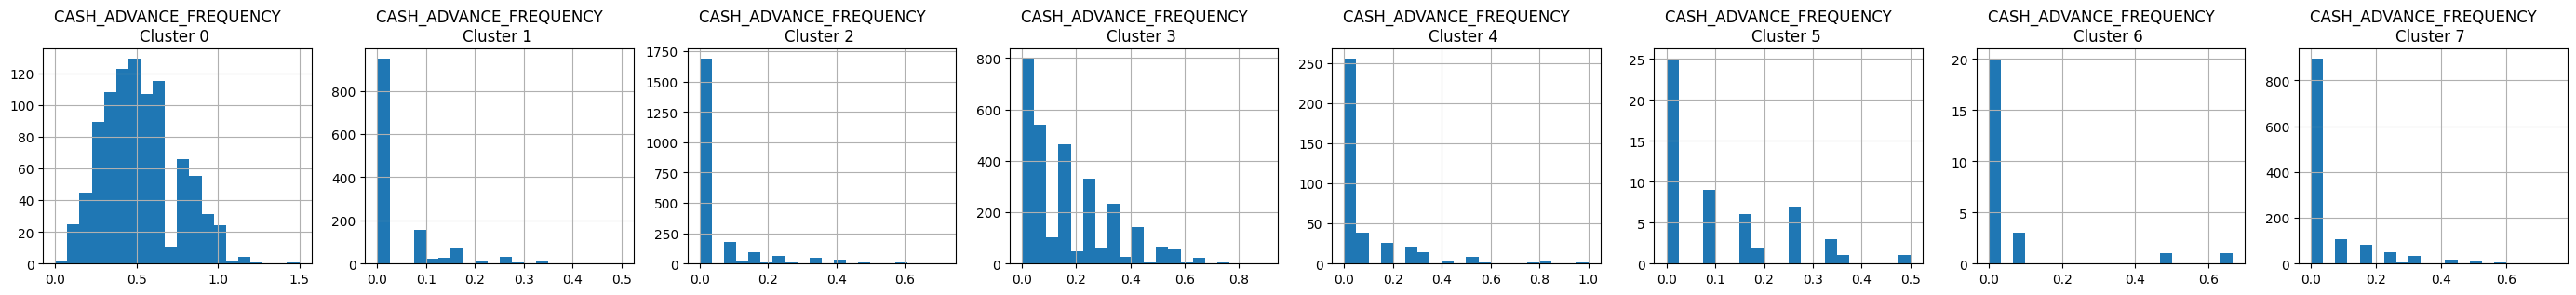

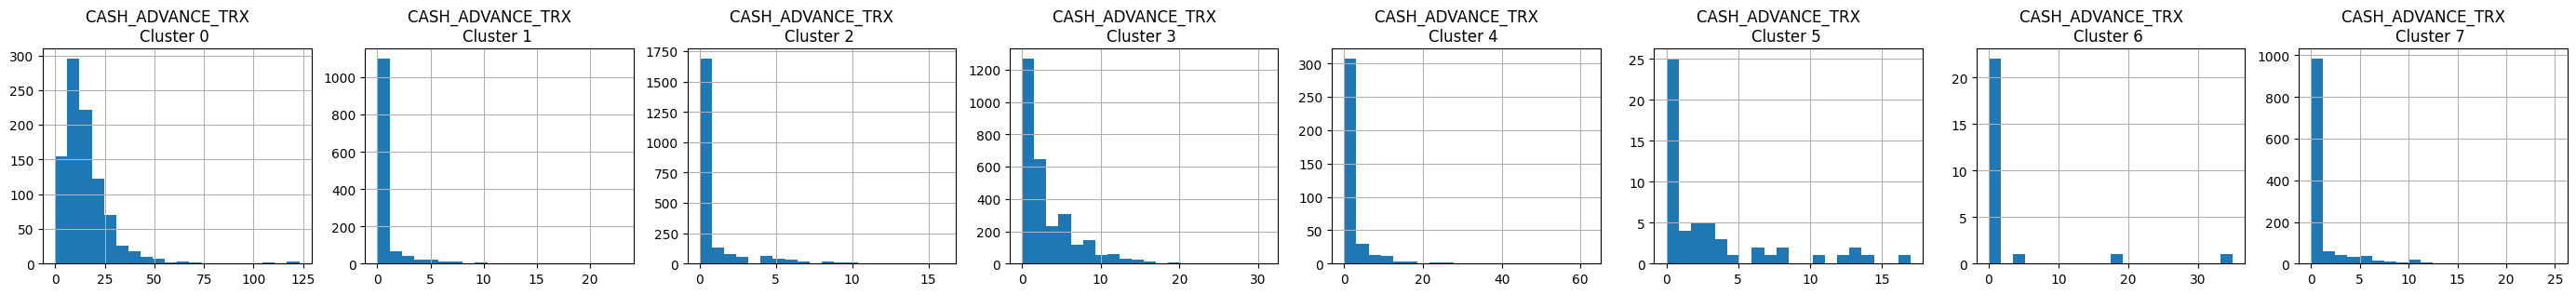

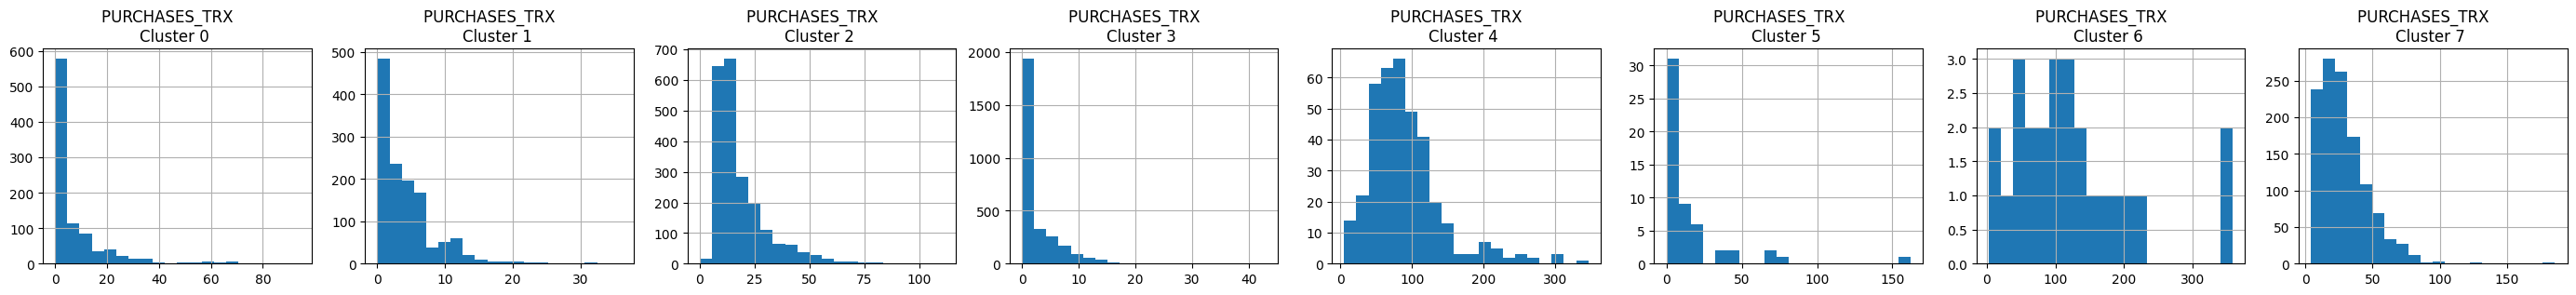

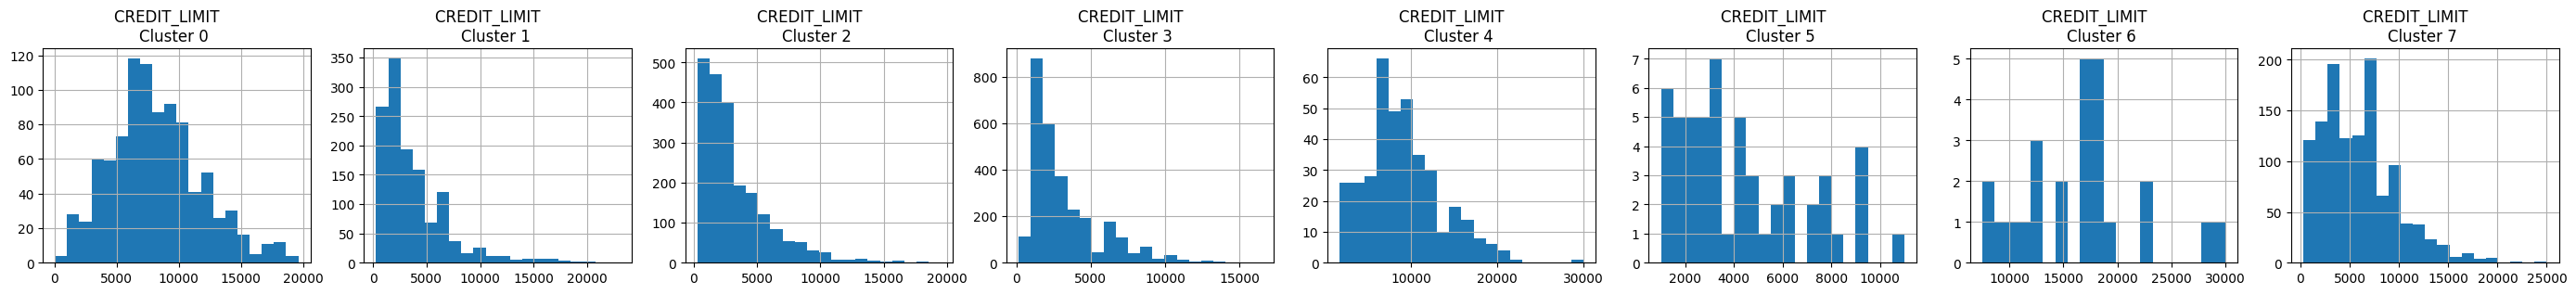

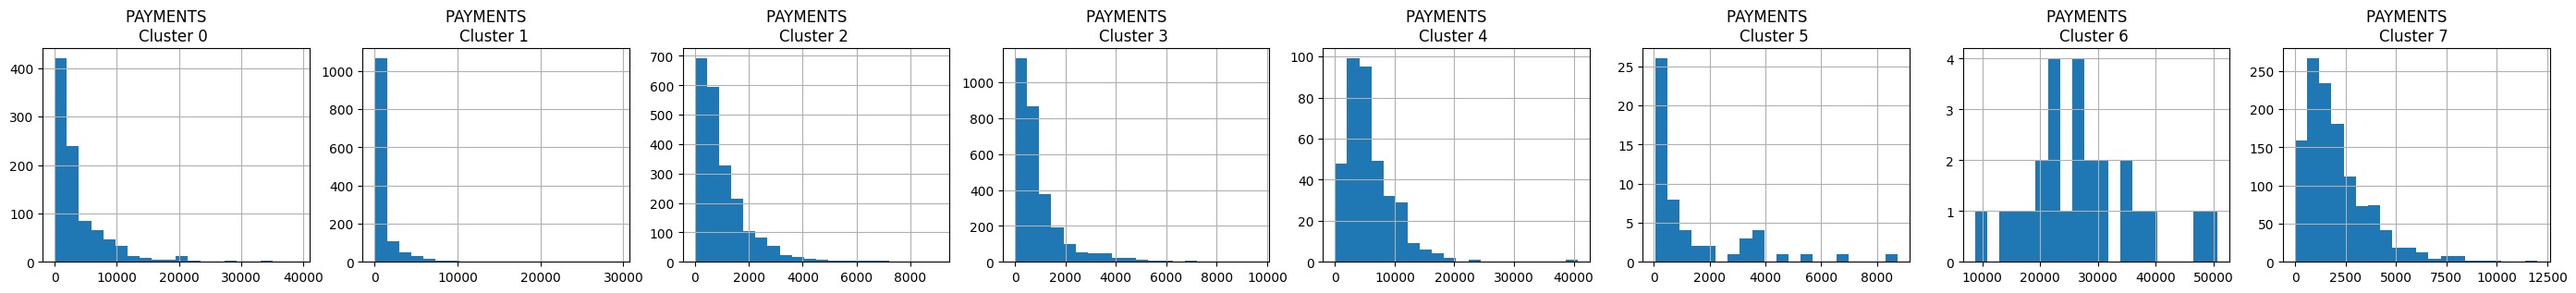

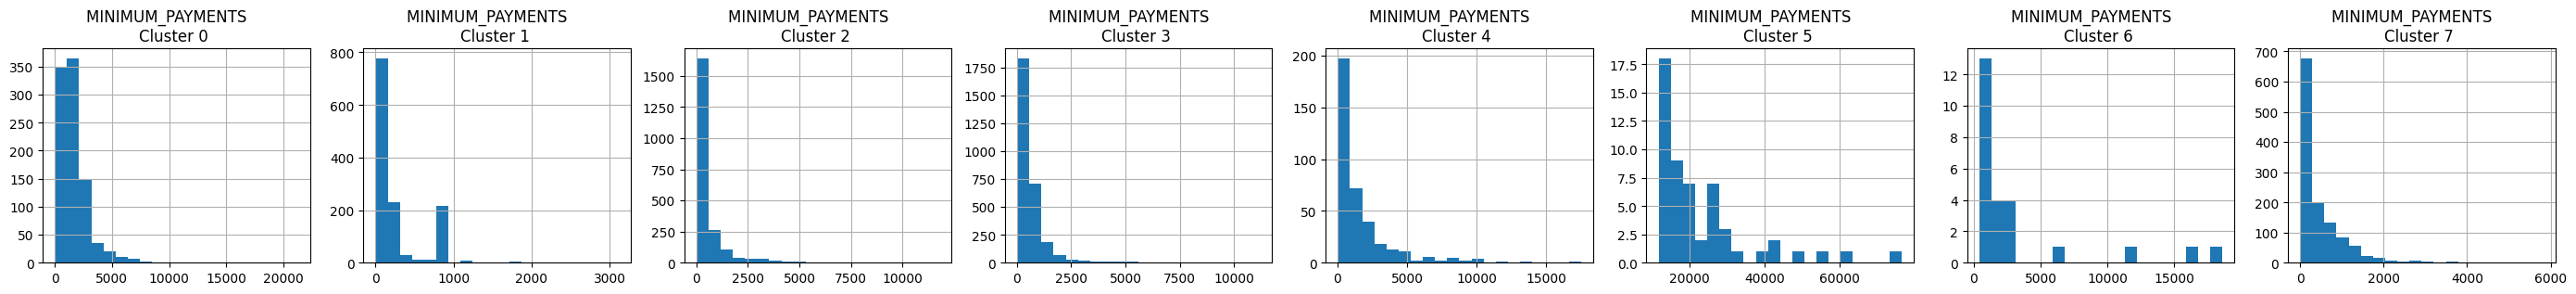

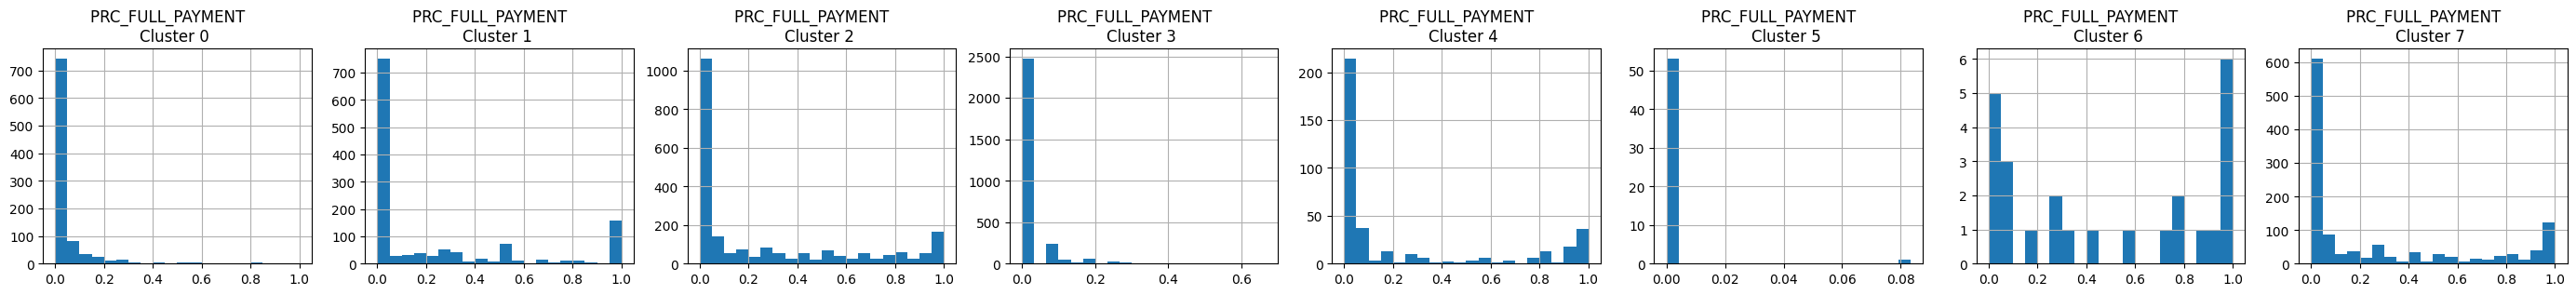

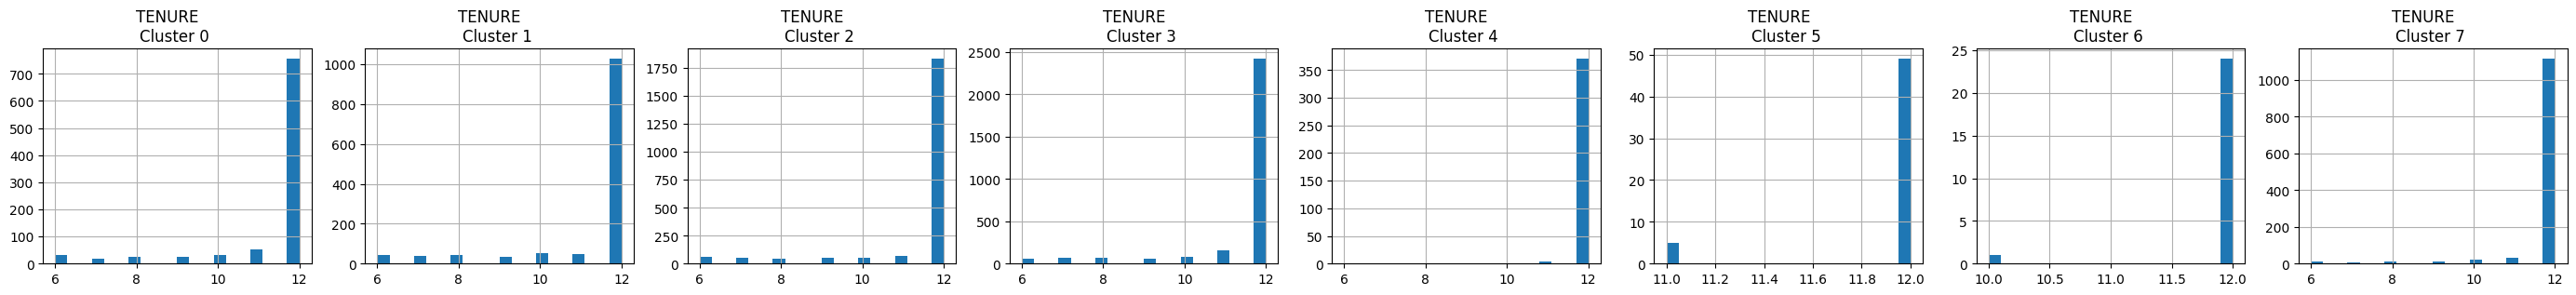

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 3))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  plt.show()

# 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.6822191 , -1.07645488],
       [-1.13828793,  2.50646789],
       [ 0.96968198, -0.38351911],
       ...,
       [-0.92620478, -1.81078783],
       [-2.33655158, -0.65796636],
       [-0.55642309, -0.40045777]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076455
1,-1.138288,2.506468
2,0.969682,-0.383519
3,-0.873629,0.043163
4,-1.599432,-0.688585


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076455,3
1,-1.138288,2.506468,0
2,0.969682,-0.383519,7
3,-0.873629,0.043163,3
4,-1.599432,-0.688585,3


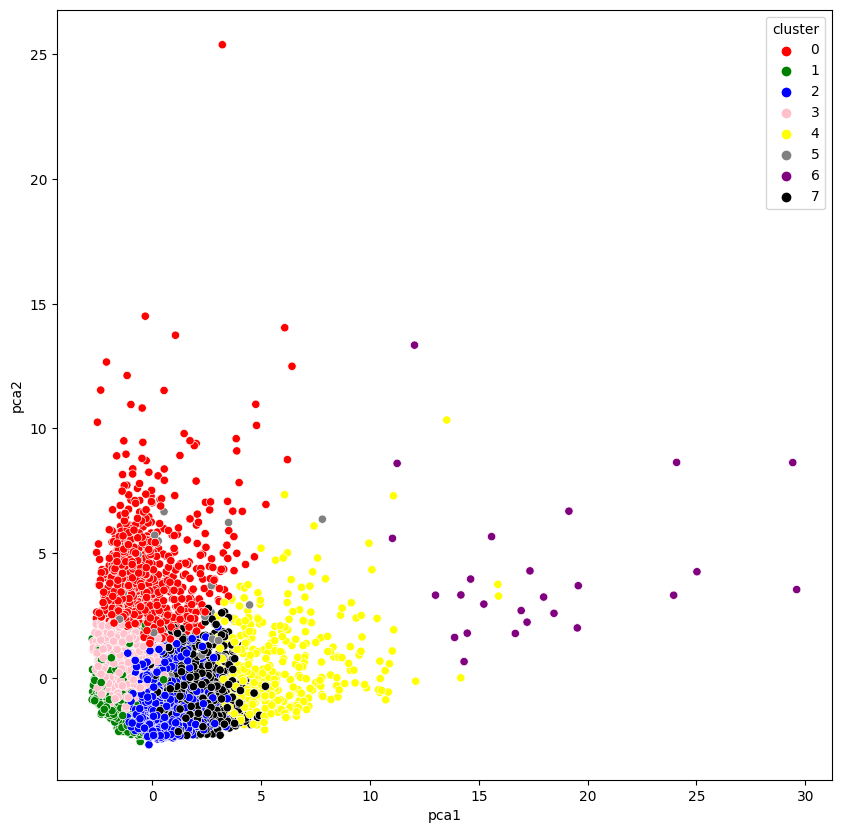

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# 8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 6s 62ms/step - loss: 0.5704
Epoch 2/25
70/70 [==============================] - 7s 94ms/step - loss: 0.3441
Epoch 3/25
70/70 [==============================] - 4s 64ms/step - loss: 0.2561
Epoch 4/25
70/70 [==============================] - 5s 65ms/step - loss: 0.2080
Epoch 5/25
70/70 [==============================] - 7s 106ms/step - loss: 0.1816
Epoch 6/25
70/70 [==============================] - 4s 62ms/step - loss: 0.1574
Epoch 7/25
70/70 [==============================] - 5s 78ms/step - loss: 0.1359
Epoch 8/25
70/70 [==============================] - 4s 62ms/step - loss: 0.1377
Epoch 9/25
70/70 [==============================] - 5s 66ms/step - loss: 0.1239
Epoch 10/25
70/70 [==============================] - 6s 86ms/step - loss: 0.1104
Epoch 11/25
70/70 [==============================] - 4s 62ms/step - loss: 0.1062
Epoch 12/25
70/70 [==============================] - 5s 65ms/step - loss: 0.1006
Epoch 13/25
70/70 [=================

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 8ms/step


In [ ]:
pred

array([[0.        , 0.900344  , 0.        , ..., 0.55604464, 0.2524306 ,
        0.15533854],
       [0.        , 1.2359221 , 0.        , ..., 1.8348472 , 2.0650692 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08872541, 1.4110371 ,
        0.11712944],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6891341 , 0.34553096,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.1009068 , 0.7467887 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.483368  , 1.6645471 ,
        0.        ]], dtype=float32)

In [ ]:
pred.shape

(8950, 10)

In [ ]:
# Optimum number of clusters
# kmeans
# PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

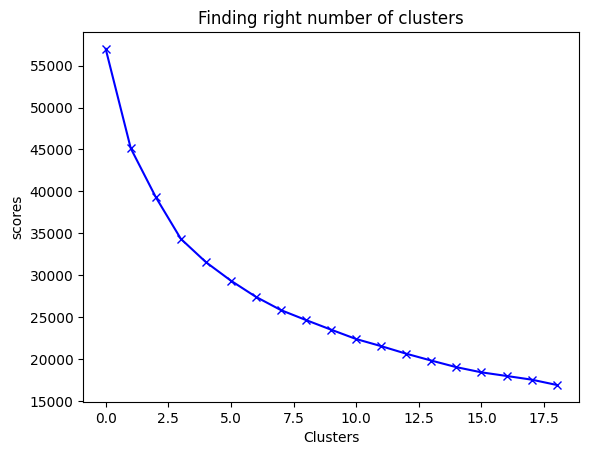

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

<ipython-input-56-f92e553c1e1d>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(score_1, 'bx-', color = 'r')
<ipython-input-56-f92e553c1e1d>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


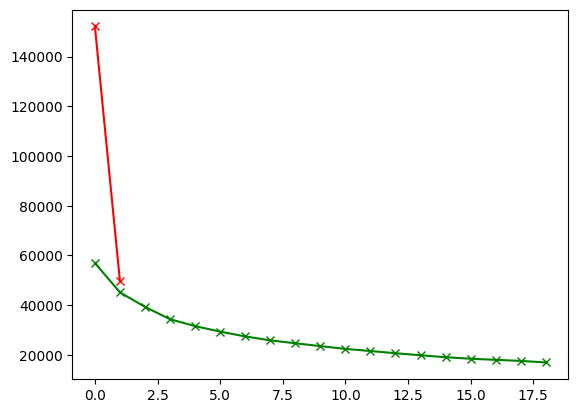

In [ ]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.112385,-0.384674
1,0.263252,1.747343
2,-0.481913,-0.078881
3,-0.571822,0.183243
4,-1.331719,-0.251129


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.112385,-0.384674,0
1,0.263252,1.747343,3
2,-0.481913,-0.078881,0
3,-0.571822,0.183243,0
4,-1.331719,-0.251129,0


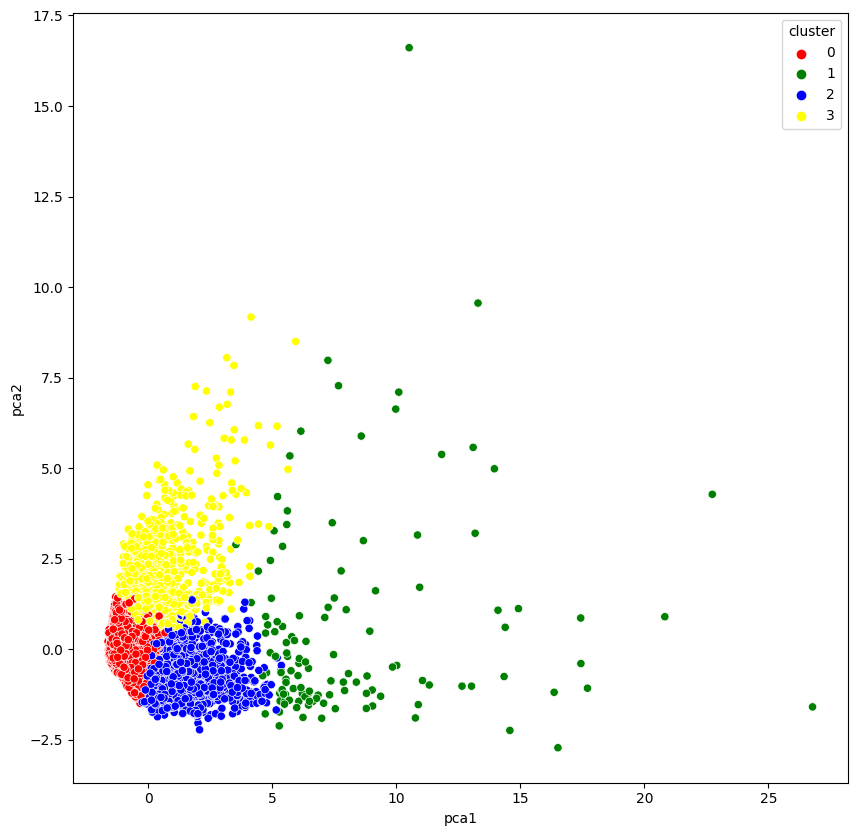

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()